# Modelo de Regressão (CinemaTicketRef Dataset)

In [6]:
#notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#import cinematicket_ref.csv

### Objetivo:
Tentar prever o preço total de vendas com base em outras variáveis

In [9]:
df = pd.read_csv('datasets/cinematicket_ref.csv', sep=",", header=0)
df.dropna(inplace=True)

cinema={}
cinema["features"] = np.hstack([df.values[::, :2], df.values[::, 3:9]])
cinema["target"] = df.values[:, 2]

#passando de 1D para 2D
# cinema['features'].reshape(-1,1)
# cinema['target'].reshape(-1,1)

print(cinema['features'].shape)
print(cinema['target'].shape)

(142399, 8)
(142399,)


(99679, 8)
(99679,)
Mean squared error: 122233811518719.19
Coefficient of determination: 0.88


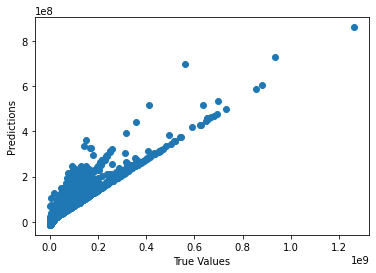

Coefficients: 
 [-10619.94155915   8613.59327399  56688.92175321  12972.81648657
  83941.02328061 -83060.03317296    168.24614249  43716.10526664]
Intercept: 
 -711554.3918836452
Score: 
 0.8782777857794126
Model: 
 LinearRegression()
scores: 
 [-1.30869889e+14 -1.00795508e+14 -1.17417639e+14 -1.18444186e+14
 -1.22398358e+14 -1.46098571e+14 -1.15834000e+14]
-121694021487173.08
12984668242228.432


In [12]:
def regression_analysis(target, features):
    # split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3)
    print(x_train.shape)
    print(y_train.shape)

    # train the model
    model = LinearRegression()
    model.fit(x_train, y_train)

    # make predictions
    y_pred = model.predict(x_test)

    # evaluate the model
    from sklearn.metrics import mean_squared_error, r2_score
    print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
    print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

    # plot the results
    plt.scatter(y_test, y_pred)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.show()

    # print the coefficients
    print('Coefficients: \n', model.coef_)
    # print the intercept
    print('Intercept: \n', model.intercept_)
    # print the score
    print('Score: \n', model.score(x_test, y_test))
    # print the model
    print('Model: \n', model)
    
    from sklearn.model_selection import cross_val_score
    
    scores = cross_val_score(model, x_test, y_test, cv=7, scoring='neg_mean_squared_error')
    print('scores: \n', scores)
    
    print(scores.mean())
    print(scores.std())

regression_analysis(cinema["target"], cinema["features"])
